# Hotel Booking Cancellation Analysis (EDA)

## Objective
The goal of this analysis is to understand the factors that influence hotel booking cancellations and derive business insights to support pricing, cancellation policies, and demand planning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("hotel_booking.csv")
print(data.head(10))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                       

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [5]:
data["agent"] = data["agent"].replace(np.nan, 0)
data["company"] = data["company"].replace(np.nan, 0)
data["country"] = data["country"].replace(np.nan, 0)
data["children"] = data["children"].replace(np.nan, 0)

In [8]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [9]:
print(data["phone-number"].duplicated().sum())

0


In [10]:
data["is_repeated_guest_label"] = data["is_repeated_guest"].map({1: "Yes", 0: "No"})
data["is_canceled_label"] = data["is_canceled"].map({1: "Yes", 0: "No"})

In [12]:
print(data["is_canceled_label"].head(20),data["is_repeated_guest_label"].head(20))

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8     Yes
9     Yes
10    Yes
11     No
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19     No
Name: is_canceled_label, dtype: object 0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8     No
9     No
10    No
11    No
12    No
13    No
14    No
15    No
16    No
17    No
18    No
19    No
Name: is_repeated_guest_label, dtype: object


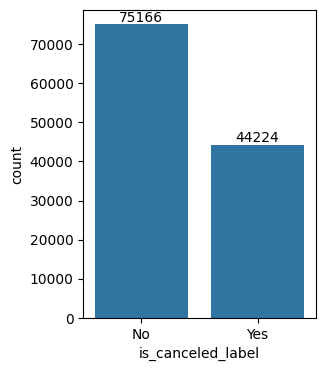

In [13]:
plt.figure(figsize = (3,4))
ax= sns.countplot(x= "is_canceled_label", data = data)
ax.bar_label(ax.containers[0])
plt.show()

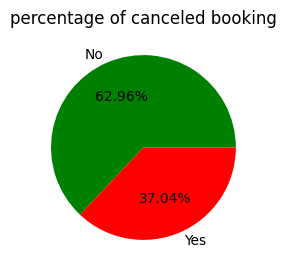

In [14]:
gb = data.groupby("is_canceled_label").agg({"is_canceled":"count"})
plt.figure(figsize = (3,3))
plt.pie(gb["is_canceled"], labels = gb.index, autopct = "%1.2f%%", colors= ["g","r"])
plt.title("percentage of canceled booking")
plt.show()

**from the given pie chart we can conclude that 37.04% of customers have cancelled out.
Now let's explore the reason behind it...**

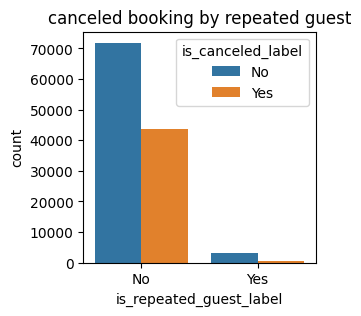

In [15]:
plt.figure(figsize = (3,3))
sns.countplot(x= "is_repeated_guest_label", data = data, hue = "is_canceled_label")
plt.title("canceled booking by repeated guest")
plt.show()

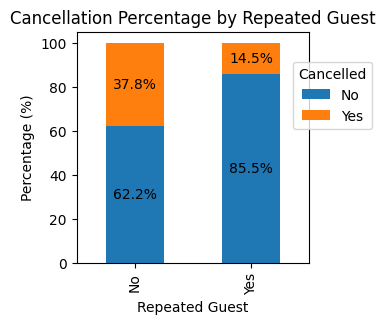

In [16]:
pct_table = pd.crosstab(
    data['is_repeated_guest_label'],
    data['is_canceled_label'],
    normalize='index'
) * 100
ax = pct_table.plot(kind='bar', stacked=True, figsize=(3,3))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.ylabel('Percentage (%)')
plt.xlabel('Repeated Guest')
plt.title('Cancellation Percentage by Repeated Guest')
plt.legend(title='Cancelled', bbox_to_anchor = (0.9,0.9))
plt.show()

*I used a 100% stacked bar chart to compare cancellation behavior fairly between repeated and non-repeated guests, avoiding bias caused by different booking volumes.*

In [17]:
data_clean = data[data['market_segment'] != 'Undefined']

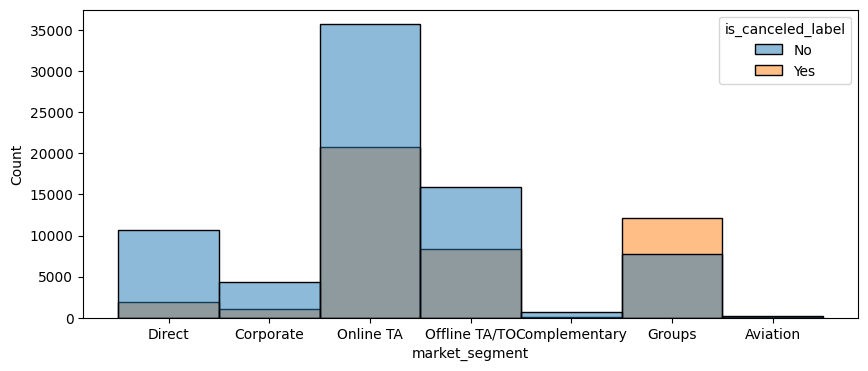

In [18]:
plt.figure(figsize = (10,4))
sns.histplot(x = "market_segment", data = data_clean, bins = 50, hue = "is_canceled_label")
plt.show()

*This chart shows how booking cancellations vary across different booking channels. Most bookings come from online travel agents, and they also account for the highest number of cancellations simply because of their volume. However, corporate and direct bookings show fewer cancellations, indicating more reliable customers. Group bookings show a noticeable level of cancellations, suggesting higher uncertainty when many people are involved. Overall, cancellations are more common in third-party and group bookings compared to direct or corporate bookings.*

C:\Users\hp\AppData\Local\Temp\ipykernel_16580\3396488168.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('lead_time_bin')['is_canceled_label']


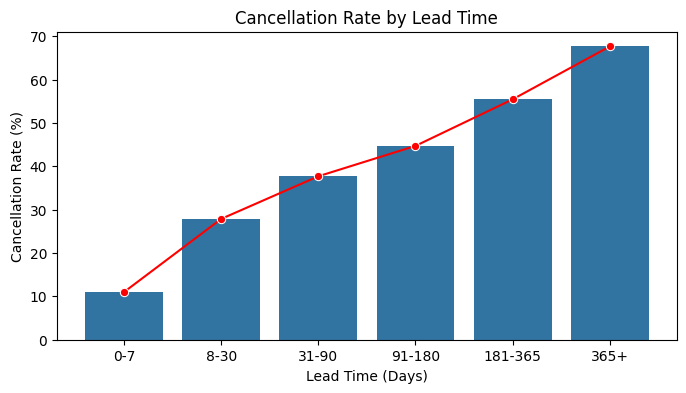

In [19]:
data['lead_time_bin'] = pd.cut(
    data['lead_time'],
    bins=[0, 7, 30, 90, 180, 365, 800],
    labels=['0-7', '8-30', '31-90', '91-180', '181-365', '365+']
)
cancel_rate = (
    data.groupby('lead_time_bin')['is_canceled_label']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

cancel_rate = cancel_rate[cancel_rate['is_canceled_label'] == 'Yes']
cancel_rate['percentage'] *= 100

plt.figure(figsize=(8,4))

sns.barplot(
    x='lead_time_bin',
    y='percentage',
    data=cancel_rate
)
sns.lineplot(
    x='lead_time_bin',
    y='percentage',
    data=cancel_rate,
    marker='o',
    color='red'
)

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Lead Time (Days)')
plt.title('Cancellation Rate by Lead Time')
plt.show()

*The bars show how many bookings are canceled in each booking-time range, and the line shows that cancellations steadily increase when people book further in advance.*

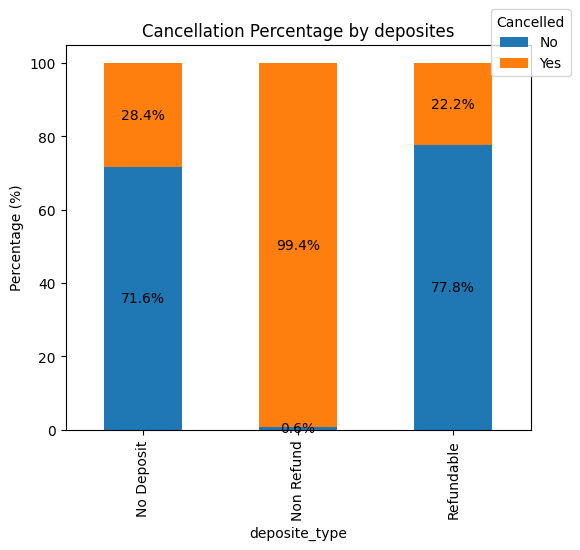

In [46]:
pct_table = pd.crosstab(
    data['deposit_type'],
    data['is_canceled_label'],
    normalize='index'
) * 100
ax = pct_table.plot(kind='bar', stacked=True, figsize=(6,5))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.ylabel('Percentage (%)')
plt.xlabel('deposite_type')
plt.title('Cancellation Percentage by deposites')
plt.legend(title='Cancelled', bbox_to_anchor = (0.9,0.9))
plt.show()

*Bookings with non-refundable deposits are often canceled, but the hotel still earns revenue from the deposit. So while cancellation numbers are high, revenue loss is lower.*

In [21]:
pd.crosstab(data['deposit_type'], data['is_canceled'])

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


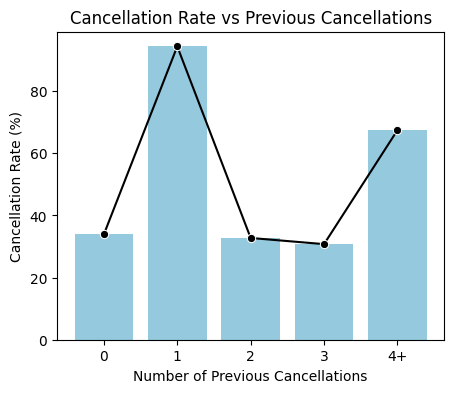

In [70]:
data['prev_cancel_capped'] = data['previous_cancellations'].apply(
    lambda x: str(x) if x <= 3 else '4+'
)

prev_cancel_rate = (
    data.groupby('prev_cancel_capped')['is_canceled']
    .mean()
    .reset_index()
)

prev_cancel_rate['is_canceled'] *= 100
plt.figure(figsize=(5,4))

sns.barplot(
    x='prev_cancel_capped',
    y='is_canceled',
    data=prev_cancel_rate,
    color='skyblue'
)

sns.lineplot(
    x='prev_cancel_capped',
    y='is_canceled',
    data=prev_cancel_rate,
    marker='o',
    color='black'
)

plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate vs Previous Cancellations')
plt.show()

*Customers who canceled bookings in the past are much more likely to cancel again. Even one previous cancellation significantly increases the risk, making past behavior a strong indicator of future cancellations.*

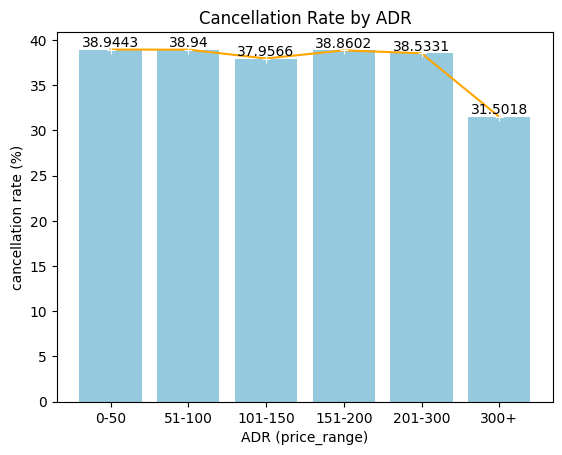

In [37]:
data['adr_bins'] = pd.cut(data["adr"], bins = [50,100,150,200,250,300,500], labels = ['0-50','51-100','101-150','151-200','201-300','300+'])
adr_cancel_rate = (data.groupby('adr_bins',observed = True)['is_canceled'].mean().reset_index()) 
adr_cancel_rate['is_canceled'] *= 100
ax =sns.barplot(x = 'adr_bins', y = 'is_canceled',data = adr_cancel_rate, color = 'skyblue')
sns.lineplot(x = 'adr_bins', y = 'is_canceled', data = adr_cancel_rate, marker = '+', color = 'orange')
plt.xlabel('ADR (price_range)')
plt.ylabel('cancellation rate (%)')
plt.title('Cancellation Rate by ADR')
ax.bar_label(ax.containers[0])
plt.show()

*This chart shows how cancellation behavior changes with room price. Most price ranges have similar cancellation rates, but very high-priced bookings are less likely to be canceled. This suggests that premium customers are more committed to their bookings.*

In [57]:
monthly_cancel_rate = monthly_cancel_rate.sort_values('arrival_month')
print(monthly_cancel_rate)

    arrival_month  is_canceled
0             100    30.477315
1             200    33.415964
2             300    32.152338
3             400    40.797186
4             500    39.665847
5             600    41.457172
6             700    37.453598
7             800    37.753117
8             900    39.170156
9            1000    38.046595
10           1100    31.233441
11           1200    34.970501


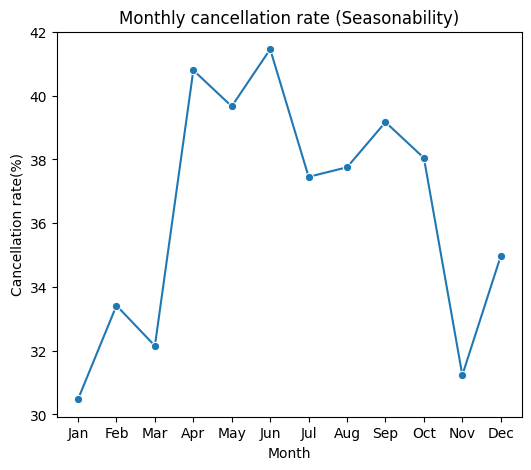

In [65]:
data['arrival_month'] = pd.to_datetime(data['arrival_date_month'],format = '%B').dt.month
monthly_cancel_rate = (data.groupby('arrival_month')['is_canceled'].mean().reset_index())
monthly_cancel_rate['is_canceled'] *= 100

plt.figure(figsize = (6,5))
sns.lineplot(x= 'arrival_month',y= 'is_canceled', data = monthly_cancel_rate, marker = 'o')
plt.xlabel('Month')
plt.ylabel('Cancellation rate(%)')
plt.title('Monthly cancellation rate (Seasonability)')

ax = plt.gca()
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.show()

*Cancellations are seasonal. Customers are more likely to cancel bookings during peak and mid-year travel months, while early-year and late-year bookings are more stable.*

## Key Takeaways

- Long lead-time bookings are more likely to cancel  
- No-deposit bookings carry the highest cancellation risk  
- Previous cancellation behavior is a strong predictor  
- Cancellation patterns show clear seasonality  
- High ADR bookings are generally more committed
